## 분석1 : 월 별 매출 변화율 분석 (거리두기 on + off 전부 합쳐서)

In [ ]:
# 업종별 합계만 집계
mask = credit_df['업종명'] =='합계'
df1 = credit_df[mask]
df1

,지역,업종명,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,...,2021/04,2021/05,2021/06,2021/07,2021/08,2021/09,2021/10,2021/11,2021/12,2022/01
0,서울,합계,69240259,64613174,66446113,68952576,70776142,70235581,74374187,69873914,...,85907226,86030337,87899797,90345940,83655395,88086573,88401437,93251430,92461453,94378602
32,부산,합계,6049065,5927276,5998038,5912058,6178744,6075228,6068489,6183496,...,5804239,5958408,6081920,5942905,5558794,5967173,6247080,6393620,6045493,6195807
64,대구,합계,3717256,3706111,3762052,3769256,3906083,3773283,3728432,3759413,...,3732037,3787424,3666347,3649878,3532213,3785698,3928754,4129446,4068342,3992476
96,인천,합계,4434194,4334978,4494753,4470534,4574945,4359091,4100096,4121832,...,3825227,3916362,3938287,3823602,3781562,3991896,4121353,4165274,3837130,3773853
128,광주,합계,2649227,2634058,2764129,2701945,2761407,2678335,2761171,2905880,...,2680427,2611206,2684373,2730044,2684998,2783734,2834117,3099080,2975730,2839103
160,대전,합계,3056319,2957001,3013333,2950770,3040680,2979207,2937842,3053176,...,2548035,2538788,2538277,2450766,2423081,2706518,2791781,2773758,2742418,2747645
192,울산,합계,1572962,1522663,1564377,1561746,1638911,1597721,1609299,1610662,...,1455960,1465527,1533267,1571429,1494984,1529714,1620228,1671060,1606759,1518525
224,경기,합계,31571272,30954580,32551975,31698165,30976800,29681749,29760581,29336922,...,33786197,34517460,34509380,34416655,33869886,35452866,36703607,37584147,36092866,35770778
256,강원,합계,2396108,2325113,2288922,2284136,2539390,2512889,2580535,3003031,...,2471185,2644708,2693391,2801501,2969336,2705124,2861890,2810331,2565063,2664960
288,충북,합계,2111608,2116030,2230967,2270507,2399835,2343948,2271990,2384398,...,2306275,2379128,2393978,2413669,2343535,2392460,2498916,2583541,2325913,2279390


#### 데이터 정제

In [ ]:
df1.iloc[:,2:].sum().index[:]

Index(['2019/01', '2019/02', '2019/03', '2019/04', '2019/05', '2019/06',
       '2019/07', '2019/08', '2019/09', '2019/10', '2019/11', '2019/12',
       '2020/01', '2020/02', '2020/03', '2020/04', '2020/05', '2020/06',
       '2020/07', '2020/08', '2020/09', '2020/10', '2020/11', '2020/12',
       '2021/01', '2021/02', '2021/03', '2021/04', '2021/05', '2021/06',
       '2021/07', '2021/08', '2021/09', '2021/10', '2021/11', '2021/12',
       '2022/01'],
      dtype='object')

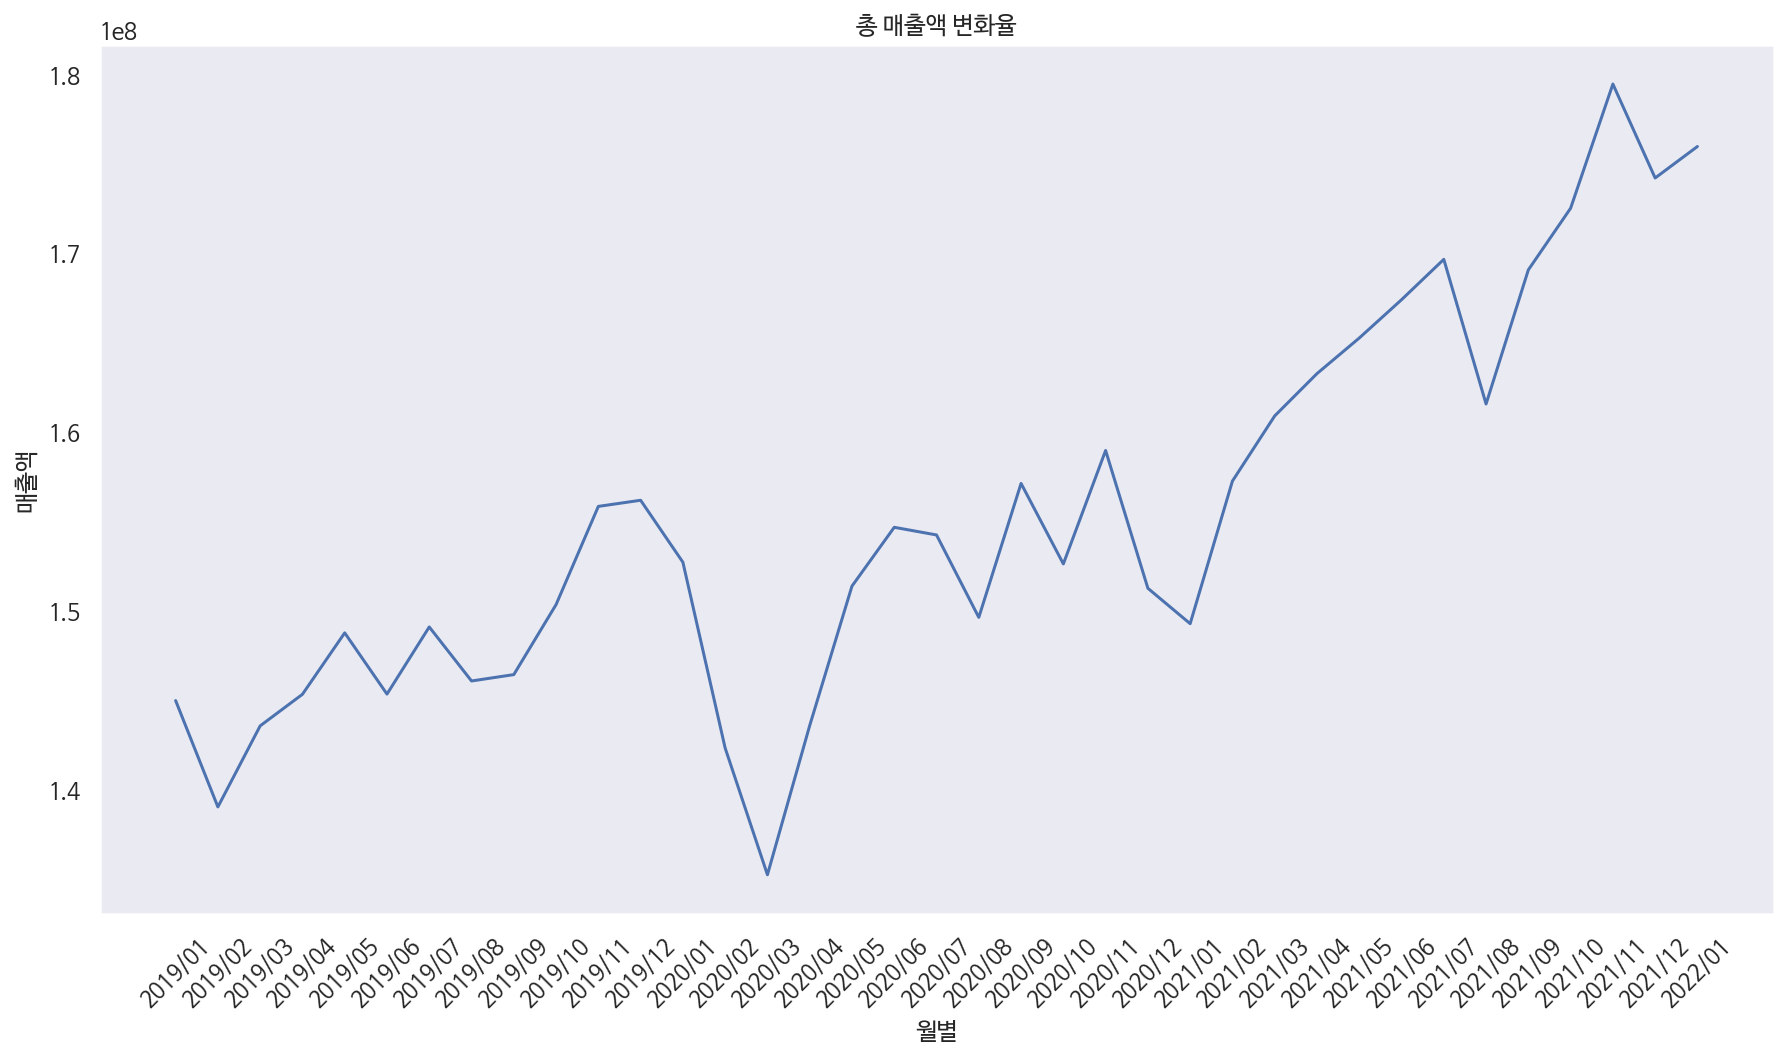

In [ ]:
# 시각화 - plot : lineplot     
plt.rc('font', family='NanumBarunGothic') #위에 초기세팅할때 집어넣었는데도 시각화 할때마다 안치면 한글깨짐...

plt.figure(figsize=(15,8))
plt.plot(df1.iloc[:,2:].sum().index[:],df1.iloc[:,2:].sum())

plt.xlabel('월별')
plt.ylabel('매출액')
plt.title('총 매출액 변화율')

plt.xticks(rotation=45)

plt.grid()
plt.show()